https://colab.research.google.com/drive/1fckC4Su4Cqx0rtnOiZgE5yY4SnWsN8DY

# **Lab 6 : Differential Equations**
**Patrik Svensson**

# **Abstract**
In this lab we have explored the area of differential equations. The result of the lab are implementations of two approximate algorithms that can inital value problems on the form $du/dt = f(u,t)$. The first implementation solves scalar inital value problems, and the second solves system of inital value problems.

# **Set up environment**
To set up the environment, run the two following lines of code.

In [0]:
import numpy as np
import unittest
import scipy.integrate as integrate
from scipy.integrate import solve_ivp
import random
from scipy.misc import derivative
import matplotlib.pyplot as plt
import math

# **Introduction**
Differential equations has been eversince Newton and Leibniz formalized integration and differentiation been an important role in many fields. Phenomenon in nature science can be modeled with differential equations, like Newton's law of nature, and fluidmechanics. Compared to a regular "equation" that we are used to, where we need to find an x that has a value that satisfies the equation. In a differential equation, the x that we are looking for is exchanged with an unknown function that satisfies an equation that commonly contains differentials of the unknown function.

# **Methods**
In this chapter, I will present how the implementation of the functions was conducted. The study was conducted in the following way.

1.   Literature research
2.   Implementation
3.   Testing

In the sections below, I have provided a reference to where the algorithms were founded, or how it was deduced, followed with a code implementation in Python, and lastly unit test for the assurance of the accuracy of the implementations.

## Time stepping for scalar initial value problem du/dt = f(u,t)
We define an initial value problem as:

$u(t) = f(u(t), t)$ where $0 < t \leq T$

$u(0) = u_0$

The function $u$ maps the domain $[0,T] \rightarrow R$. To approximate the initial value problem we use the concept of time steppin, which means that we only calculate $u(t)$ for some points in the interval $[0,T]$, hence we get:

$0 = t_0 < t_1 < ... < t_n = T$

We can construct an approximation $U(t)$ for any value in the above interval. This can be achived by interpolation on all the subintervals $I_n = [t_{n-1}, t_n]$ of length $k_n = t_n - t_{n-1}$. If we want to calculate the solution at $t_n$ we can use the forward difference approximation of the derivative at datapoint $t_{n-1}$ from which we can derive *Euler method* for succesive approximations of $U_n = U(t_n)$, which is given by the following formula that is given in section 13.2 in the lecture notes.

$U_n = U_{n-1} + k_nf(U_{n-1},t_{n-1})$

There are two different approaches for solving this problem:

1.   Explicit Euler Method
2.   Implicit Euler Method
3.   Theta method

The code is inspired by the pseudo-code 13.1 from the lecture notes. 



In [0]:
def explicit_euler_method(T, function, u_init):
  number_intervals = 1000000
  interval_size = T / number_intervals
  t = 0
  u = 0
  for i in range(number_intervals):
    u = u_init + interval_size*function(t, u_init)
    u_init = u
    t += interval_size
  
  return u

I have provided unit test below to verify the accuracy and the stability of the implemented algorithm. The stability can be defined as how small pertubations propagate in time. To decide the stability we have to find the equilibrium points denoted by $u^*$. We can find the equilibrium point by the following formula:

$f(u^*, t) = 0$, for $\forall t \ge 0$

Since our differential equation that we are testing will be on the following template $\frac{du}{dt} = a*u$, where $a < 0$. Our $f(u^*, t)$ is equal to $a*u$. The only $u$ when $f$ will be equal to zero is when $u=0$, hence $u^*=0$.  

Our instance of the problem can be described the following way:

$u'(t) = \lambda u(t)$, $u(0)=u^*$

At the same time we introduce a pertubed problem.

$v'(t) = \lambda v(t)$, $v(0) = u^* + \epsilon$

To study the propagation of the perturbation, we create a new equation from the two previous. 

$\varphi(t) = v(t) - u(t)$

Which gives us the a new differential equation:

$\varphi'(t) = \lambda\varphi(t)$, $\varphi(0) = \epsilon$

Which has $\varphi(t) = e^{t\lambda}\epsilon$ as solution.

If $\lambda$ is less than zero, the solution will converge towards 0 as $\lim_{t \to \infty}\varphi(t)$.

According to the constraints of the assignment, the $\lambda < 0$ therefore an equilibrium point together with an error will converge towards the equilibrium. In our case with $\varphi(t)$ solution, as $t$ increases the solution will close in on 0. This is shown in the graph belonging to the test below.


.

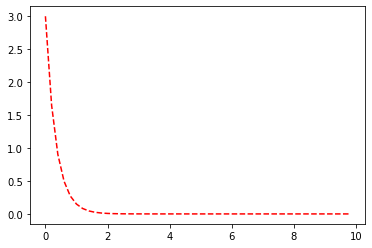

.
----------------------------------------------------------------------
Ran 2 tests in 20.210s

OK


In [0]:
class TestEulerMethod(unittest.TestCase):
  def test_accuracy(self):
    for i in range(100):
      # Arrange
      coefficient = random.randint(-5,0)
      function = lambda t, u: coefficient*u
      expected_result = integrate.solve_ivp(function, [0, 1], [19]).y[0][-1]

      # Act
      result = explicit_euler_method(1, function, 19)

      # Assert
      self.assertAlmostEqual(result, expected_result, 0)

  def test_stability(self):
      coefficient = random.randint(-5,0)
      t = np.arange(0., 10., 0.2)
      error = 3
      plt.plot(t, math.e ** (t*coefficient)*error, 'r--')
      plt.show()


if __name__ == '__main__':
    # Help from user Pierre S. in the stack overflow thread to give the main arguments: 
    # https://stackoverflow.com/questions/49952317/python3-for-unit-test-attributeerror-module-main-has-no-attribute-kerne 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

##Time stepping for a system of initial value problems du/dt = f(u,t)
When working with systems of inital value problems, instead of $u$ mapping to a scalar, we map it ta a vector.

$u:[0,T] \rightarrow R^N$

When approximating $u(t)$, it is the same as when we approxing for scalar in the previous assignment, except that we are working with vectors. Hence the code implementation below is the same a the implementation for time stepping for scalar initial value problem $du/dt = f(u,t)$.


In [0]:
def explicit_euler_method_system(T, function, u_init):
  number_intervals = 1000000
  interval_size = T / number_intervals
  t = 0
  u = 0
  for i in range(number_intervals):
    u = u_init + interval_size*function(t, u_init)
    u_init = u
    t += interval_size
  
  return u

I have provided unit test below to verify the accuracy and the stability of the implemented algorithm. To test the stability, it's similar as for time stepping for scalars. As for scalar time stepping we need to find an equilibrium point:

$f(u^*, t) = 0$, $\forall \in [0,T]$

To be able to analyze the stability to the equilibrium point we add a perturbation $\epsilon \in R^N$ to the eqation.

$v'(t) = f(v(t),t)$, $0 < t \le T$

$v(0) = u^* + \epsilon$

Similar to the scalar time stepping stability analysis, we compose a new differential equation with $\varphi(t) = v(t) - u(t)$, which yields:

$\varphi'(t) = f(v(t),t)-f(u(t), t)$, $0 < t\le T$

$\varphi(0) = \epsilon$

If we assume that our model takes the following shape $\varphi'(t) = A\varphi(t)$, therefore we get the solution $\varphi(t) = e^{At}\epsilon$.

According to the lecture notes, if A has a eigenvalue where the real part is positive the $\epsilon$ will grow exponentialy. If all the real parts are negative, the pertubation will decay at an exponential rate. 



In [0]:
class TestEulerMethod(unittest.TestCase):
  def test_accuracy(self):
    for i in range(10):
      # Arrange
      coefficient = random.randint(-5,0)
      function = lambda t, u: coefficient*u
      expected_result_per_timestep = solve_ivp(function, np.array([0, 1]), np.array([1, 2])).y
      expected_result = np.array([expected_result_per_timestep[0][-1], expected_result_per_timestep[1][-1]])
      # Act
      result = explicit_euler_method_system(1, function, np.array([1, 2]))

      # Assert
      np.testing.assert_almost_equal(result, expected_result, 1)
      
if __name__ == '__main__':
    # Help from user Pierre S. in the stack overflow thread to give the main arguments: 
    # https://stackoverflow.com/questions/49952317/python3-for-unit-test-attributeerror-module-main-has-no-attribute-kerne 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Below is a test that shows that if we choose a matrix that has atleast one positive eigenvalue, the function will diverge exponentially from the equilibrium point. The y-axis respresent the error residual from the equilibrium point, and x-axis represents time.

Eigenvalues: [4.41421356 1.58578644]


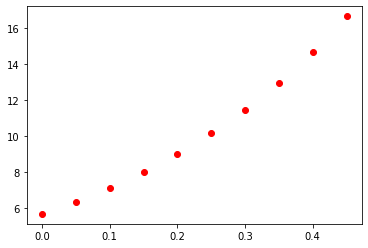

In [0]:

A = np.array([[3,2],[1,3]])
print("Eigenvalues: " + str(np.linalg.eig(A)[0]))
t = np.arange(0., .5, 0.05)
error = np.array([2,2])
for i in range(len(t)):
  plt.plot(t[i], np.linalg.norm(np.dot(math.e ** (A*t[i]), error)) , 'ro')
plt.show()

Below is a test that shows that if we choose a matrix that has only negative eigenvalue, the function will diverge exponentially from the equilibrium point. The y-axis respresent the error residual from the equilibrium point, and x-axis represents time.

Eigenvalues: [-1. -3.]


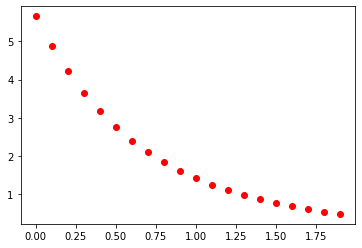

In [0]:

A = np.array([[-2,-1],[-1,-2]])
print("Eigenvalues: " + str(np.linalg.eig(A)[0]))
t = np.arange(0., 2., 0.1)
error = np.array([2,2])
for i in range(len(t)):
  plt.plot(t[i], np.linalg.norm(np.dot(math.e ** (A*t[i]), error)) , 'ro')
plt.show()

# **Results**
The result is refelected in the implementations above.

# **Discussion**
In the time-stepping methods, it would have been intresting to implement implicit Euler method and theta method as well to compare the performance in different situations.  